In [1]:
pip install xlrd

     |████████████████████████████████| 103 kB 5.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

     |████████████████████████████████| 320.4 MB 72 kB/s s eta 0:00:01     |████████████▏                   | 121.4 MB 65.3 MB/s eta 0:00:04     |██████████████                  | 140.2 MB 71.5 MB/s eta 0:00:03     |███████████████████████▉        | 238.7 MB 42.8 MB/s eta 0:00:02     |████████████████████████▍       | 244.7 MB 202 kB/s eta 0:06:14     |████████████████████████▌       | 245.7 MB 202 kB/s eta 0:06:09     |██████████████████████████▋     | 266.0 MB 202 kB/s eta 0:04:29     |████████████████████████████▋   | 286.0 MB 42.6 MB/s eta 0:00:01     |█████████████████████████████   | 290.8 MB 42.6 MB/s eta 0:00:01     |█████████████████████████████▌  | 295.6 MB 42.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 61.3 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 391 kB/s  eta 0:00:01     |███████████████▍                | 20 kB 17.9 MB/s eta 0:00:01
     |████████████████████████████████| 459 kB 29.0 MB/s eta 0:00:01
     |███████████████████████

In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
url="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_43471f2bd2794959b9bf879eb61322aa.xlsx"
df=pd.read_excel(url)
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12 00:00:00,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12 00:00:00,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12 00:00:00,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12 00:00:00,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12 00:00:00,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [2]:
df.shape

(8760, 14)

In [3]:
X=df.drop(["Date","Rented Bike Count"],axis=1)
X.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
X_o=X[["Seasons","Holiday","Functioning Day"]]
X_o.head()

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes


In [5]:
from sklearn.preprocessing import LabelEncoder
X_o=X_o.apply(LabelEncoder().fit_transform)
X_o.head()

,Seasons,Holiday,Functioning Day
0,3,1,1
1,3,1,1
2,3,1,1
3,3,1,1
4,3,1,1


In [6]:
X=X.drop(["Seasons","Holiday","Functioning Day"],axis=1)
X=pd.concat([X,X_o],axis=1)
X.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1


In [7]:
import datetime
X["Month"]=pd.DatetimeIndex(df['Date']).month
X["Day"]=pd.DatetimeIndex(df["Date"]).day
X["Weekday"]=pd.DatetimeIndex(df["Date"]).weekday
X.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day,Weekday
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1,1,12,3
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1,1,12,3
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1,1,12,3
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1,1,12,3
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1,1,12,3


In [8]:
y=df[["Rented Bike Count"]]
y.head()

,Rented Bike Count
0,254
1,204
2,173
3,107
4,78


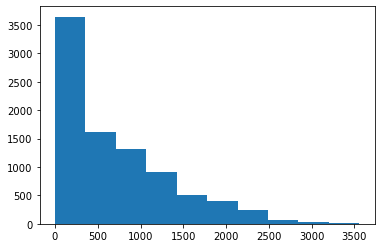

In [9]:
import matplotlib.pyplot as plt
plt.hist(y)
plt.show()

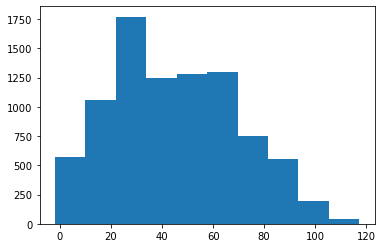

In [10]:
import numpy as np
plt.hist(2*(np.sqrt(y)-1))
plt.show()

In [11]:
y=2*(np.sqrt(y)-1)
y.head()

,Rented Bike Count
0,29.874755
1,26.565714
2,24.305893
3,18.688161
4,15.663522


In [12]:
yt=np.asarray(y).reshape(y.shape[0],)

In [13]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

test = SelectKBest(score_func=f_regression, k="all")
fit = test.fit(X,yt)
features = fit.transform(X)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False).nlargest(16,"scores")
scores

,scores
1,3595.456348
0,1572.023924
5,1398.323417
11,1234.698939
6,885.649867
9,535.559384
2,477.193101
4,380.139733
7,240.657394
8,215.836333


In [14]:
#scores=scores[scores["scores"]>=100]
#X=X.iloc[:,scores.index]
#X.head()

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
names=X.columns
X=pd.DataFrame(scaler.fit_transform(X),columns=names)
X.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day,Weekday
0,-1.661325,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,1.349771,0.227757,0.18668,-1.602745,-0.42297,-0.01096
1,-1.516862,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,1.349771,0.227757,0.18668,-1.602745,-0.42297,-0.01096
2,-1.372399,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.1318,-0.171891,1.349771,0.227757,0.18668,-1.602745,-0.42297,-0.01096
3,-1.227936,-1.597680,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,1.349771,0.227757,0.18668,-1.602745,-0.42297,-0.01096
4,-1.083473,-1.580936,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.1318,-0.171891,1.349771,0.227757,0.18668,-1.602745,-0.42297,-0.01096


In [16]:
#names=y.columns
#y=pd.DataFrame(scaler.fit_transform(y),columns=names)
#y.head()

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.115, random_state=42)
print(X_train.shape)
print(X_test.shape)

(7752, 15)
(1008, 15)


In [26]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(loss="ls",learning_rate=0.003,n_estimators=31000,subsample=0.32,min_samples_split=2,max_depth=9,max_features="sqrt",warm_start=True).fit(X_train,y_train)
model

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor(learning_rate=0.003, max_depth=9, max_features='sqrt',
                          n_estimators=31000, subsample=0.32, warm_start=True)

In [27]:
from sklearn.metrics import r2_score
y0hat=model.predict(X_train)
print("R-squared on train data is: ",r2_score(y_train,y0hat))
y1hat=model.predict(X_test)
print("R-squared on test data is: ",r2_score(y_test,y1hat))

R-squared on train data is:  0.9999883196153398
R-squared on test data is:  0.9541042791921696


In [28]:
y1hat=pd.DataFrame(y1hat)
y1hat=((y1hat/2)+1)**2
y1hat.head()

,0
0,1888.229835
1,697.272288
2,708.141514
3,2347.501690
4,835.223604


In [31]:
y_test=((y_test/2)+1)**2
y_test.head()

,Rented Bike Count
6056,1728.0
5556,822.0
5990,658.0
7674,2716.0
3319,1083.0


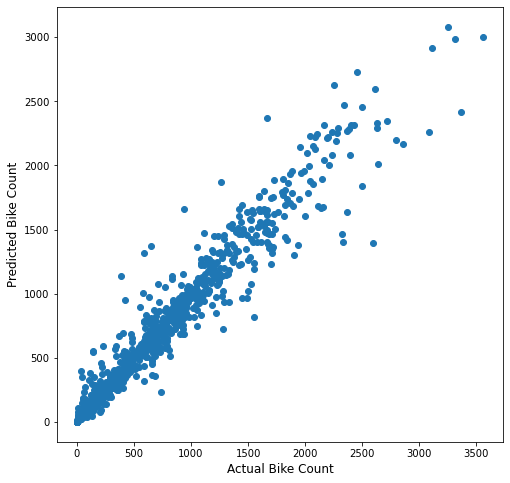

In [34]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,y1hat)
plt.xlabel("Actual Bike Count",fontsize=12)
plt.ylabel("Predicted Bike Count",fontsize=12)
plt.show()